In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
from matplotlib import style
style.use('ggplot')
import re

from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
data = pd.read_csv('/content/IMDB Dataset.csv')

In [4]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
data.shape

(50000, 2)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


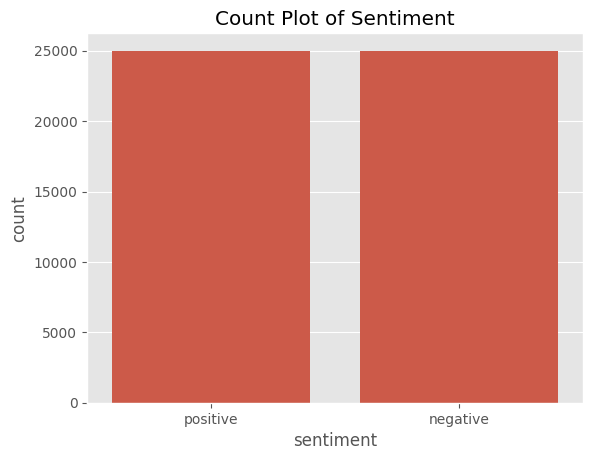

In [8]:
## Count plot of sentiment feature
sns.countplot(x = 'sentiment', data = data)
plt.title('Count Plot of Sentiment')
plt.show()

In [13]:
# Print the first five reviews and their sentiment
for i in range(5):
  print('Review: ', [i], '\n')
  print(data['review'].iloc[i], "\n")
  print('Sentiment: ', data['sentiment'].iloc[i], "\n\n")

Review:  [0] 

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is

In [17]:
## Word count in each Review
def Number_of_words(text):
  words = text.split()
  word_count = len(words)
  return word_count

In [18]:
# Adding Number_of_Words as column to the dataset
data['Number_of_Words'] = data['review'].apply(Number_of_words)

In [19]:
data.head()

,review,sentiment,Number_of_Words
0,One of the other reviewers has mentioned that ...,positive,307
1,A wonderful little production. <br /><br />The...,positive,162
2,I thought this was a wonderful way to spend ti...,positive,166
3,Basically there's a family where a little boy ...,negative,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230


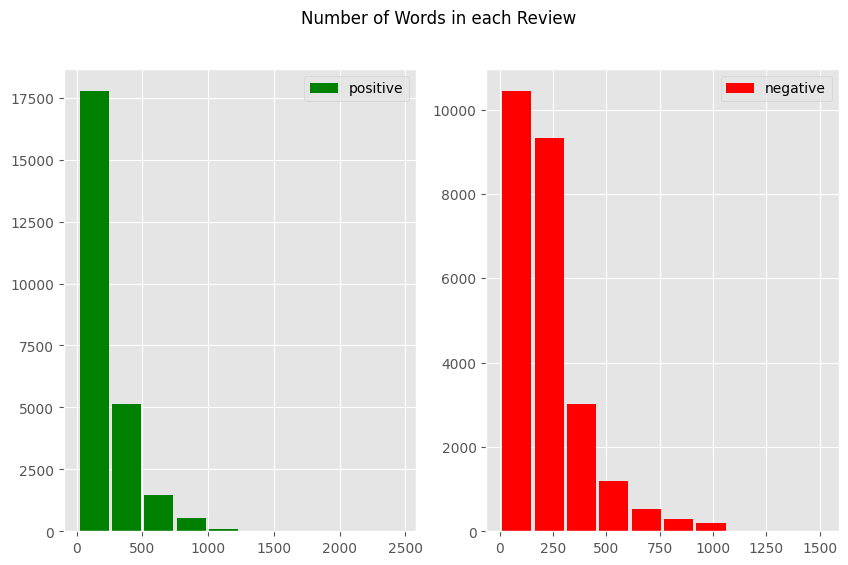

In [23]:
# Plotting the Number_of_Words
fig, ax = plt.subplots(1,2, figsize = (10,6))
ax[0].hist(data[data['sentiment'] == 'positive'] ['Number_of_Words'], label = 'positive', color = 'green', rwidth = 0.9);
ax[0].legend()
ax[1].hist(data[data['sentiment'] == 'negative'] ['Number_of_Words'], label = 'negative', color = 'red', rwidth = 0.9);
ax[1].legend()
fig.suptitle('Number of Words in each Review')
plt.show()

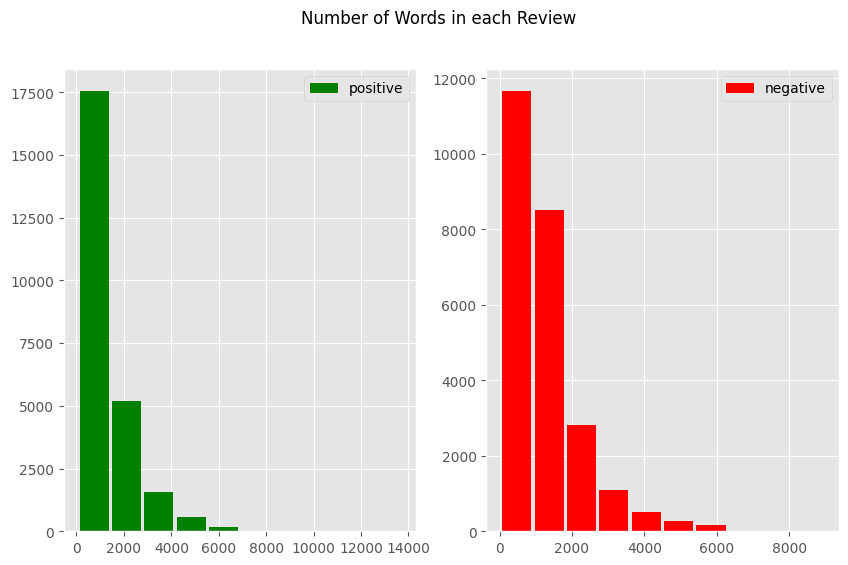

In [25]:
# Visualizing the length of positive and negative reviews
fig, ax = plt.subplots(1,2, figsize = (10,6))
ax[0].hist(data[data['sentiment'] == 'positive'] ['review'].str.len(), label = 'positive', color = 'green', rwidth = 0.9);
ax[0].legend()
ax[1].hist(data[data['sentiment'] == 'negative'] ['review'].str.len(), label = 'negative', color = 'red', rwidth = 0.9);
ax[1].legend()
fig.suptitle('Number of Words in each Review')
plt.show()

In [26]:
# Convert the target column to numerical format
data['sentiment'] = data['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

In [27]:
data

,review,sentiment,Number_of_Words
0,One of the other reviewers has mentioned that ...,1,307
1,A wonderful little production. <br /><br />The...,1,162
2,I thought this was a wonderful way to spend ti...,1,166
3,Basically there's a family where a little boy ...,0,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,230
...,...,...,...
49995,I thought this movie did a down right good job...,1,194
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0,112
49997,I am a Catholic taught in parochial elementary...,0,230
49998,I'm going to have to disagree with the previou...,0,212


Text Processing

In [28]:
def data_processing(text):
  text = text.lower()
  text = re.sub('<br/>', ' ', text)
  text = re.sub(r"https\S+|www\s+|http\S+", ' ', text, flags = re.MULTILINE)
  text = re.sub(r'\@w+|\#', ' ', text)
  text = re.sub(r'[^\w\s]', ' ', text)
  text_tokens = word_tokenize(text)
  # Filter text
  filtered_text = [w for w in text_tokens if not w in stop_words]
  return ' '.join(filtered_text)

In [31]:
# Apply on text data
import nltk
nltk.download('punkt_tab')
data['review'] = data['review'].apply(data_processing)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [32]:
# Taking a count of the duplicate entries
data_duplicate = data.duplicated().sum()
print('Number of duplicate entries: ', data_duplicate)

Number of duplicate entries:  421


In [33]:
# Drop Duplicates
data = data.drop_duplicates('review')

Performing Steming

In [34]:
stemmer = PorterStemmer()
def stemming(data):
  text = [stemmer.stem(word) for word in data]
  return data

In [35]:
# Applying the stem function on our dataset
data['review'] = data['review'].apply(lambda x: stemming(x))

<ipython-input-35-ca46e235aa63>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['review'] = data['review'].apply(lambda x: stemming(x))


In [36]:
data['word count'] = data['review'].apply(Number_of_words)

<ipython-input-36-762f70cf29a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['word count'] = data['review'].apply(Number_of_words)


In [37]:
data.head()

,review,sentiment,Number_of_Words,word count
0,one reviewers mentioned watching 1 oz episode ...,1,307,169
1,wonderful little production br br filming tech...,1,162,92
2,thought wonderful way spend time hot summer we...,1,166,89
3,basically family little boy jake thinks zombie...,0,138,72
4,petter mattei love time money visually stunnin...,1,230,133


The number of words is reduced after applying word_processing

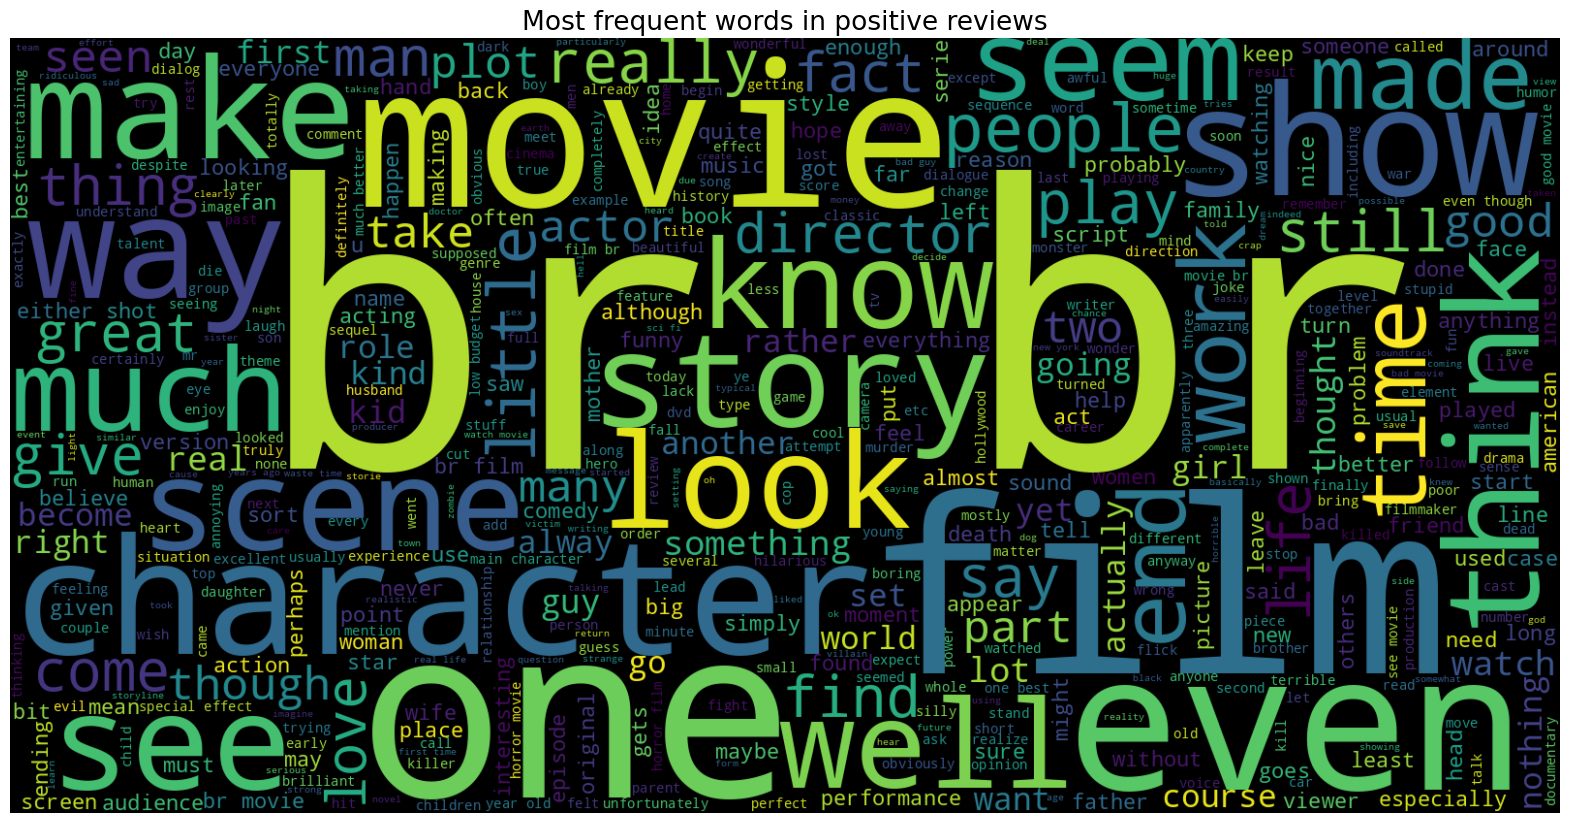

In [41]:
# Visualizing the most frequent words
text = ''.join([word for word in data['review']])
plt.figure(figsize=(20,15), facecolor="None")
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in positive reviews', fontsize=19)
plt.show()

In [42]:
# Counting the nos of 15 most frequent words

from collections import Counter
count = Counter()
for text in data['review'].values:
  for word in text.split():
    count[word] += 1

count.most_common(15)

[('br', 200393),
 ('movie', 87259),
 ('film', 79142),
 ('one', 53201),
 ('like', 39841),
 ('good', 29541),
 ('time', 24904),
 ('even', 24664),
 ('would', 24400),
 ('story', 22970),
 ('really', 22920),
 ('see', 22821),
 ('well', 21104),
 ('much', 19150),
 ('bad', 18289)]

In [43]:
Pos_words = pd.DataFrame(count.most_common(15), columns = ['Word', 'Frequency'])
Pos_words.head()

,Word,Frequency
0,br,200393
1,movie,87259
2,film,79142
3,one,53201
4,like,39841
